C:\Users\Aaron\AppData\Local\Temp\ipykernel_8248\874005017.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


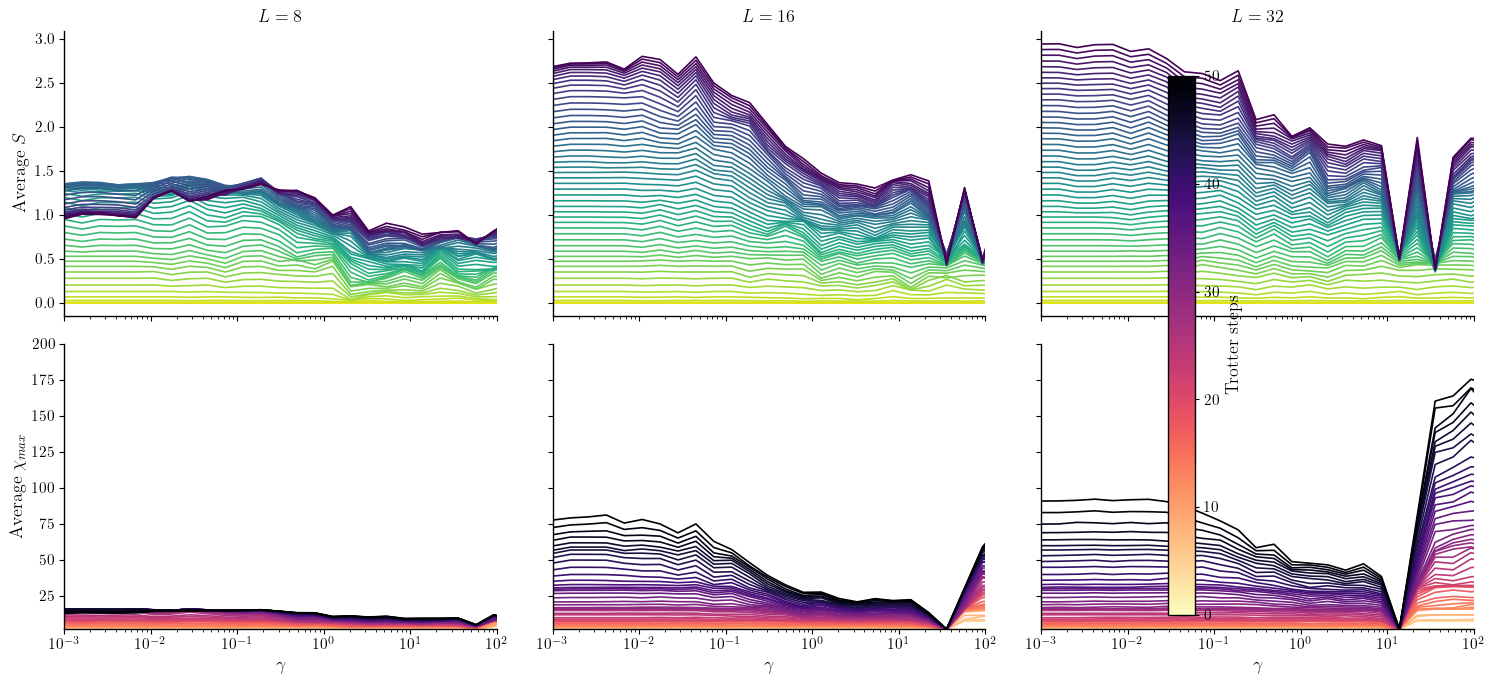

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pickle

# ----- Global plot style -----
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 13,
    "font.size": 12,
    "axes.titlesize": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "axes.linewidth": 1.0,
    "legend.fontsize": 11,
    "figure.figsize": (15, 7.0)  # 2 rows of plots
})

system_sizes = [8, 16, 32]
gammas = np.logspace(-3, 3, 30)

# Share y within each row, share x within each column
fig, axes = plt.subplots(2, len(system_sizes), sharex='col', sharey='row')

for row_type, observable_name, ylabel in zip(
    [0, 1], ["entropy", "max_bond"], ['Average $S$', 'Average $\\chi_{max}$']
):
    for idx, L in enumerate(system_sizes):
        ax = axes[row_type, idx]
        filename = f"ising_with_entropy/cost_{L}.pickle"

        with open(filename, 'rb') as f:
            data = pickle.load(f)

        results = []
        for gamma in data:
            for observable in gamma:
                if observable.gate.name == observable_name:
                    results.append(observable.results)

        results = np.array(results).T
        num_curves = len(results)

        # Set colormap
        cmap = plt.get_cmap('magma_r' if observable_name == "max_bond" else 'viridis_r')
        norm = mcolors.Normalize(vmin=0, vmax=num_curves - 1)
        colors = cmap(np.linspace(0, 1, num_curves))

        # Plot each curve
        for j in range(num_curves):
            x = np.array(gammas)
            y = results[j]
            ax.plot(x, y, color=colors[j], lw=1.2)

        ax.set_xscale('log')
        ax.set_xlim(1e-3, 1e2)
        if observable_name == "max_bond":
            ax.set_ylim(2, 200)

        if row_type == 0:
            ax.set_title(f'$L = {L}$')
        if idx == 0:
            ax.set_ylabel(ylabel)
        if row_type == 1:
            ax.set_xlabel('$\\gamma$')

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

# Add a shared colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), pad=0.02)
cbar.set_label('Trotter steps', labelpad=5)
cbar.ax.tick_params(direction='out', length=3)

# plt.tight_layout()
plt.savefig("entropy_and_maxbond_vs_gamma.pdf", dpi=300)
plt.show()
